In [10]:
import cv2
import numpy as np
from utils.show import *

# Sparse - Lucas-Kanade method with pyramids.

In [8]:
def lucas_kanade_method(video_path):
    # Read the video
    cap = cv2.VideoCapture(video_path)
    for i in range(300):
        ret, frame = cap.read()
    # Parameters for ShiTomasi corner detection
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)
    # Parameters for Lucas Kanade optical flow
    lk_params = dict(
        winSize=(15, 15),
        maxLevel=2,
        criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03),
    )
    # Create random colors
    color = np.random.randint(0, 255, (100, 3))
 # Take first frame and find corners in it
    ret, old_frame = cap.read()
    old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)
 # Create a mask image for drawing purposes
    mask = np.zeros_like(old_frame)
    points = []

    # while True:
    for i in range(30):
    # Read new frame
        ret, frame = cap.read()
        if not ret:
            break
        frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # Calculate Optical Flow
        p1, st, err = cv2.calcOpticalFlowPyrLK(
            old_gray, frame_gray, p0, None, **lk_params
        )
        # Select good points
        good_new = p1[st == 1]
        good_old = p0[st == 1]

        # Draw the tracks
        for i, (new, old) in enumerate(zip(good_new, good_old)):
            a, b = new.ravel()
            c, d = old.ravel()
            mask = cv2.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
            frame = cv2.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
        # Display the
        show(frame, mask, cv2.add(frame, mask))
        # img = cv2.add(frame, mask)


        # Update the previous frame and previous points
        old_gray = frame_gray.copy()
        p0 = good_new.reshape(-1, 1, 2)




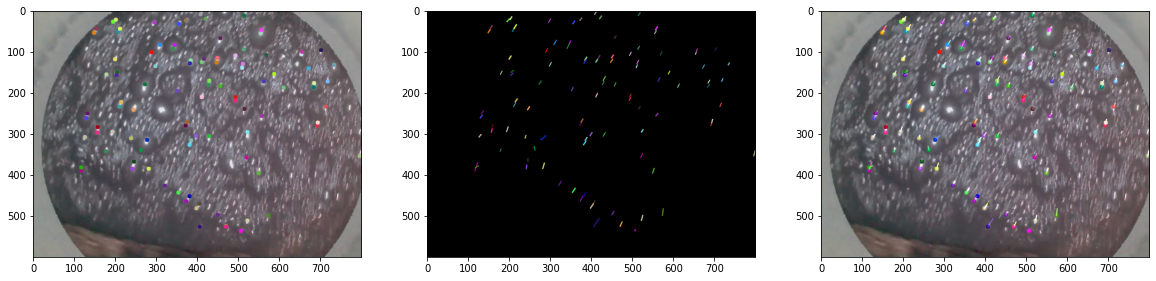

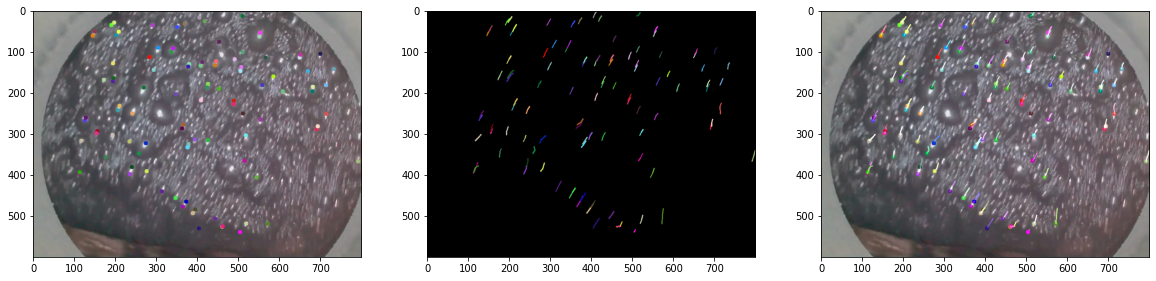

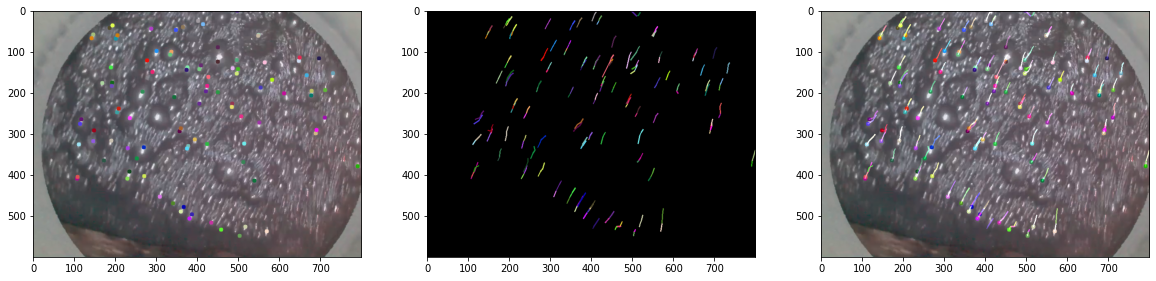

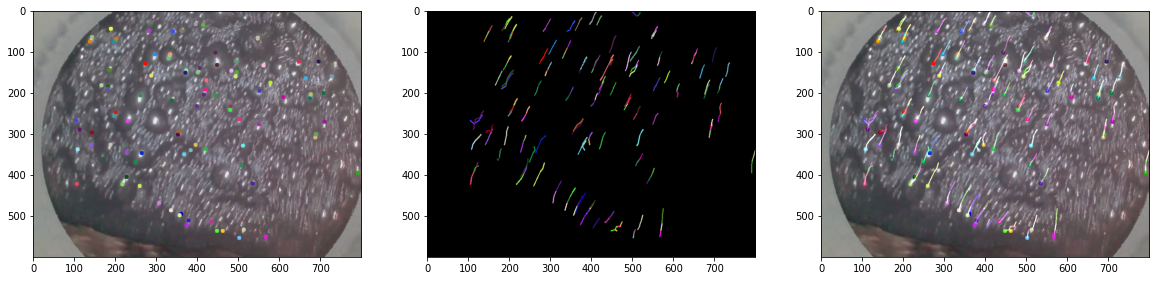

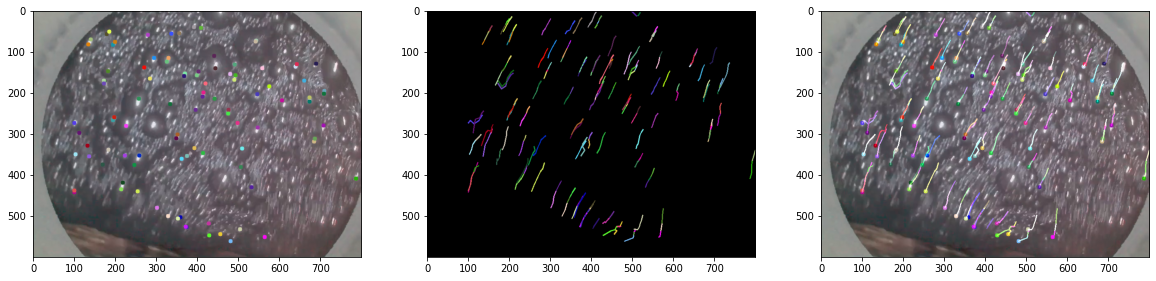

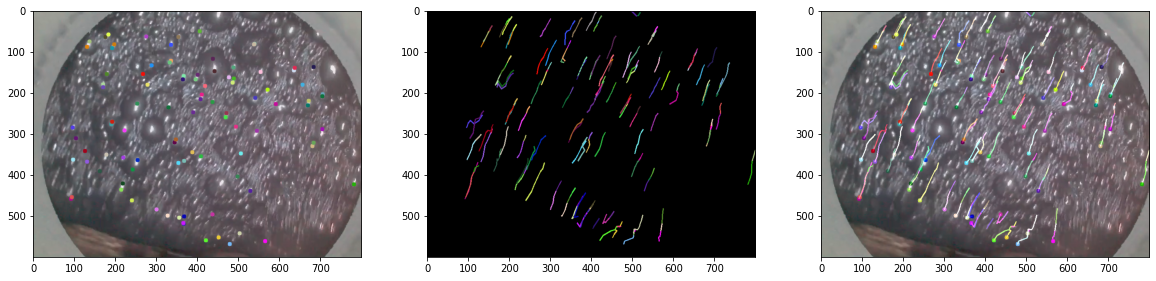

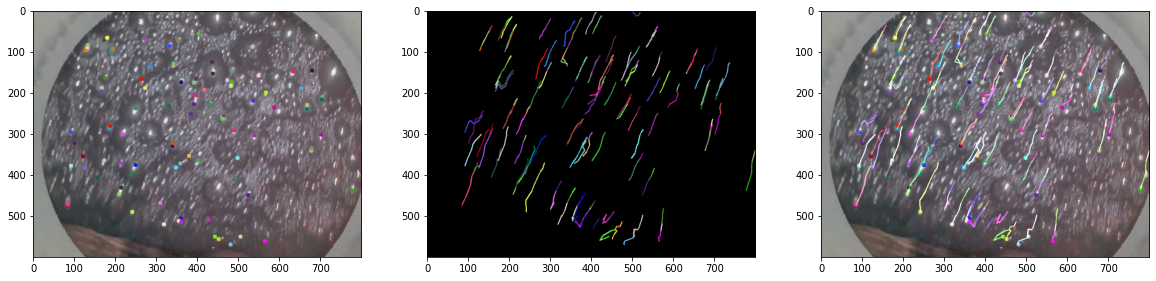

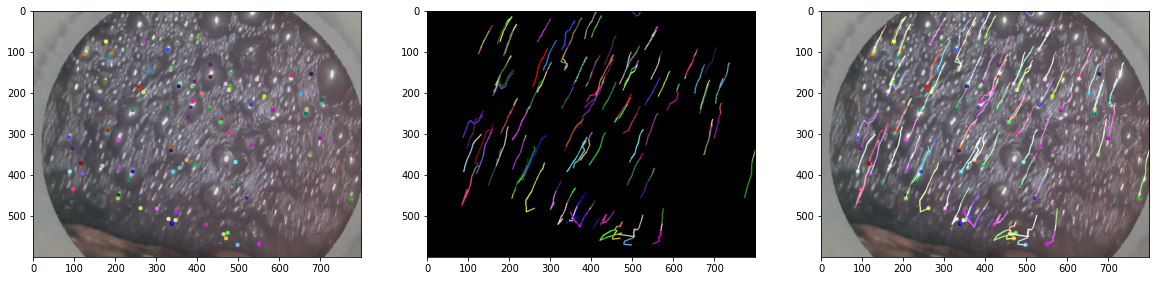

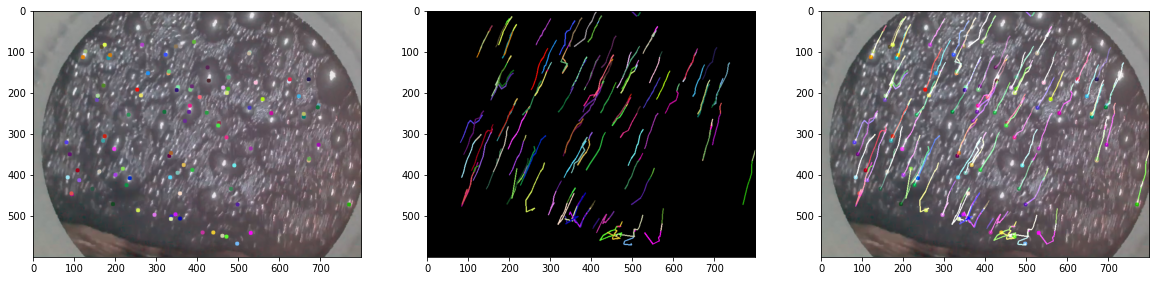

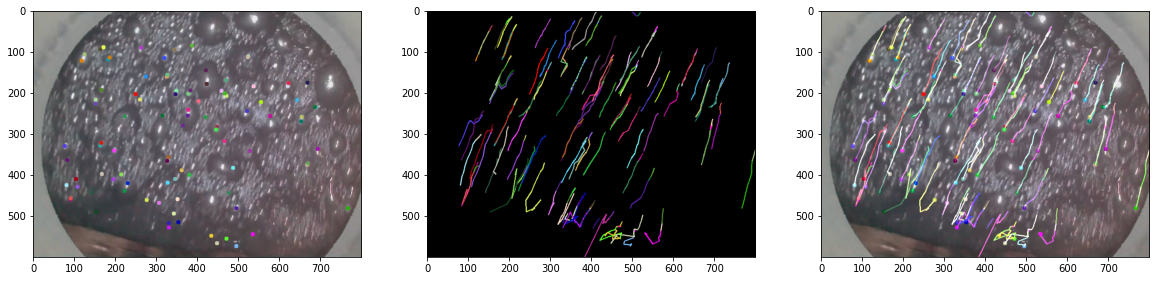

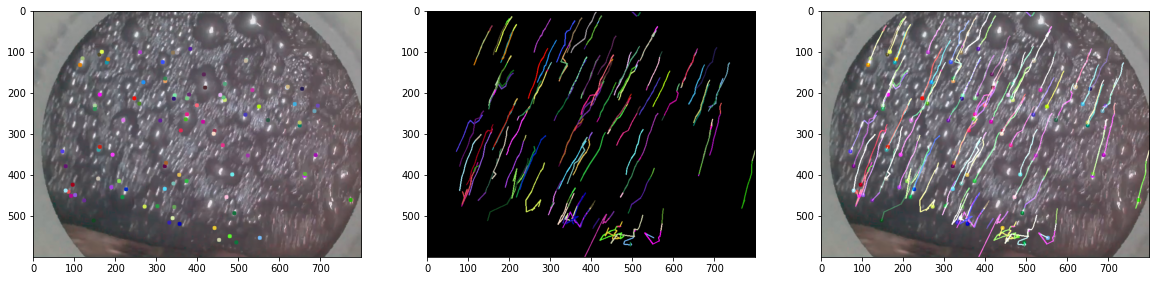

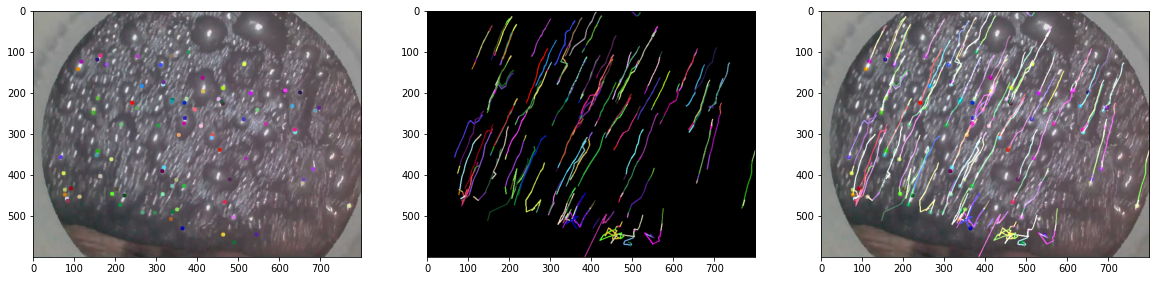

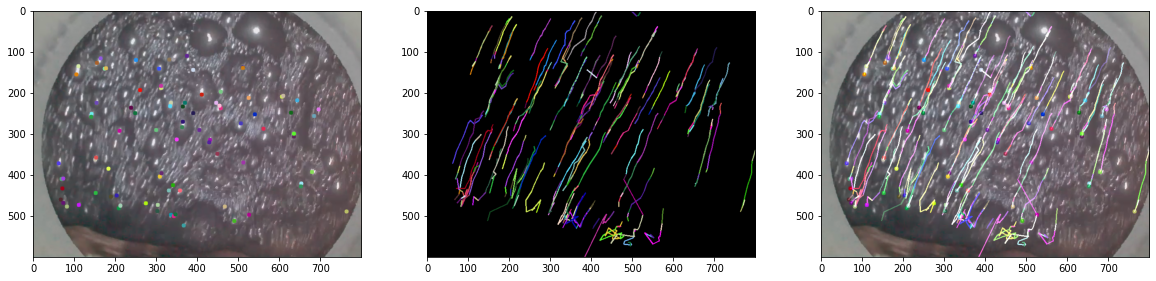

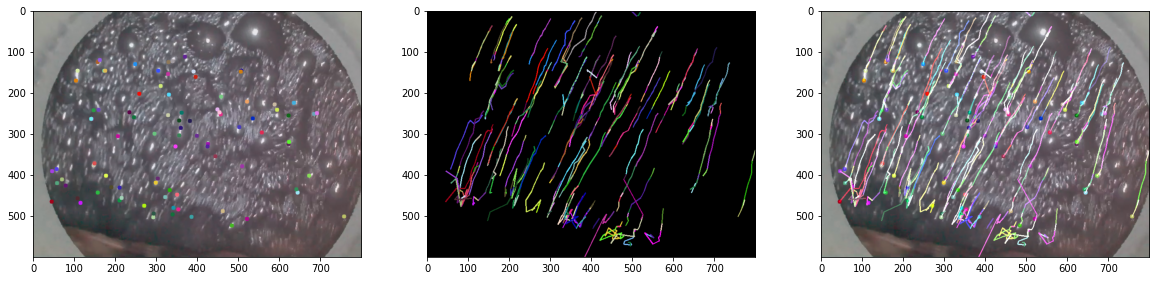

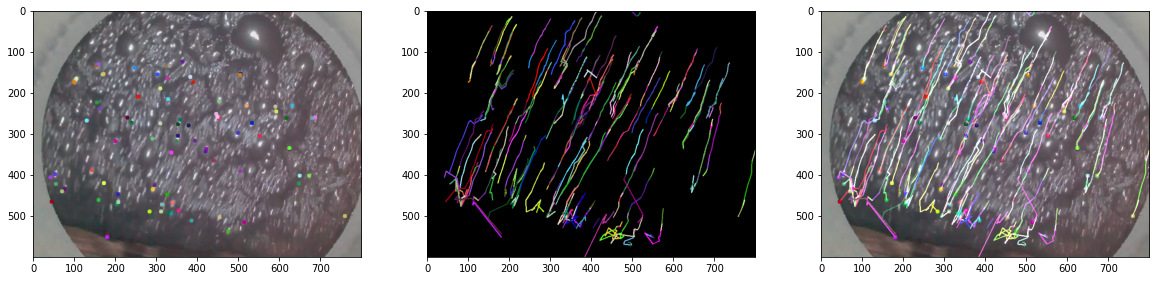

KeyboardInterrupt: 

In [9]:
lucas_kanade_method('/Users/s70c3/Projects/Nornikel-project/NornilFroathOpticalFlow/data/90_1_7.mp4')